<a href="https://colab.research.google.com/github/HenryMujati/PRODIGY_ML_02/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.



Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

ProDigy infotech



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
# Loading dataset
data = pd.read_csv('Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Selecting relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

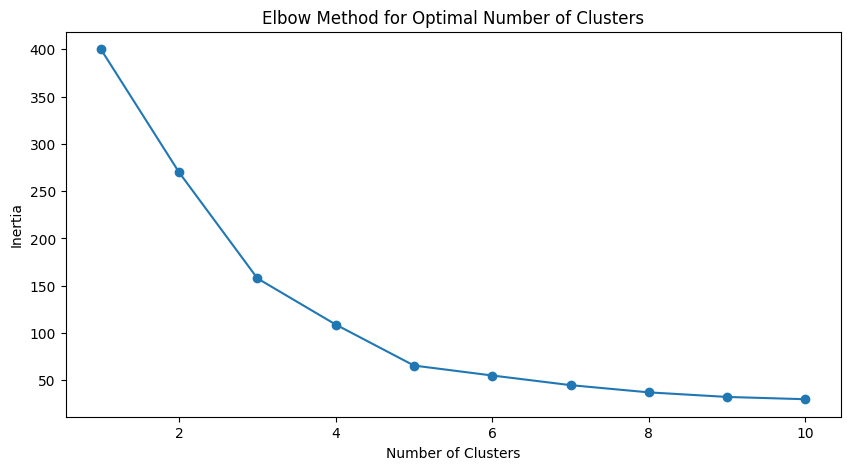

In [6]:
# Determining the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

#Adding cluster to original data
data['Cluster'] = clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


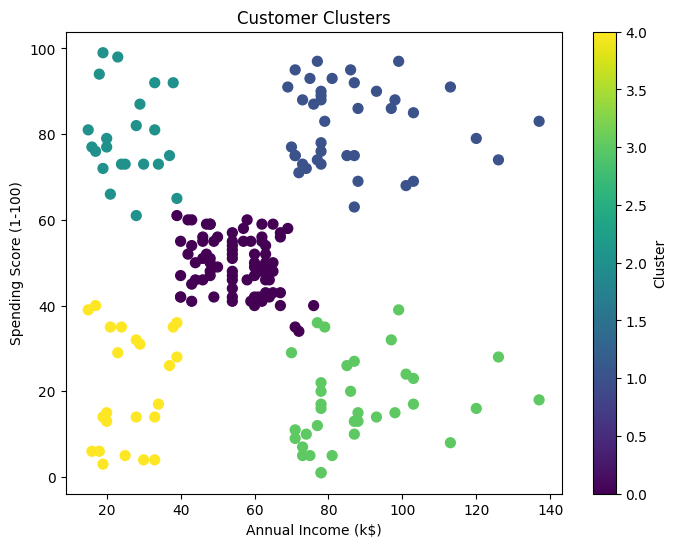

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [18]:
# Save to csv
for cluster_num in range(6):
    cluster_customers = data[data['Cluster'] == cluster_num]
    cluster_customers.to_csv(f'cluster_{cluster_num}_customers.csv', index=False)


In [20]:
#Checking to see if the clusters are accurate
data1, data2, data3 = pd.read_csv('cluster_0_customers.csv'), pd.read_csv('cluster_1_customers.csv'), pd.read_csv('cluster_2_customers.csv')
print(data1.head(), data2.head(), data3.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0          44  Female   31                  39                      61   
1          47  Female   50                  40                      55   
2          48  Female   27                  40                      47   
3          49  Female   29                  40                      42   
4          50  Female   31                  40                      42   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0         124    Male   39                  69                      91   
1         126  Female   31                  70                      77   
2         128    Male   40                  71                      95   
3         130    Male   38                  71                      75   
4         132    Male   39                  71                      75   

   Cluster  
0        1  
1     